
Datasets: Iris, Breast cancer, Wine 5 Linkages Abordagens: Topdown, bottom up https://www.kaggle.com/vipulgandhi/hierarchical-clustering-explanation

https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

1) Tipos de abordagens(Topdown, bottom up)

2) Diferentes tipos de linkage

3) Casos de uso com as combinação de linkage e abordagens, mostrando a qualidade de cada um

Aplicar os clusters a dados já anotados, comparando com o dendograma

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn import datasets
from sklearn import metrics
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet

# Hierarchical Clustering of Iris Data


In [38]:
# Loading datasets
#iris = datasets.load_iris()  # this dataset is present in the scikit-learn distribution

df_iris = pd.read_csv('datasets/iris_dataset.csv')

## The dataset contains labeled data where sepal-length, sepal-width and petal-length, petal-width of each plant is available. We will use the four attributes of the plants to cluster them into three different groups.

#### Let’s see how the dataset looks like:

In [39]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### You can see that our dataset contains numerical values for the attributes.

#### Clustering is an unsupervised technique, therefore we do not require labels in our dataset. The following script removes the “species” column that contains labels, from the dataset.

In [40]:
origial_df_iris = df_iris

In [41]:
origial_df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [42]:
# Remove the grain species from the DataFrame, save for later
species = list(df_iris.pop('Species'))

In [43]:
species

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
5,6,5.4,3.9,1.7,0.4
6,7,4.6,3.4,1.4,0.3
7,8,5.0,3.4,1.5,0.2
8,9,4.4,2.9,1.4,0.2
9,10,4.9,3.1,1.5,0.1


In [44]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
5,6,5.4,3.9,1.7,0.4
6,7,4.6,3.4,1.4,0.3
7,8,5.0,3.4,1.5,0.2
8,9,4.4,2.9,1.4,0.2
9,10,4.9,3.1,1.5,0.1


#### Let’s now see how our dataset looks like:

In [45]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


# Linkage Methods

Initially, hierarchical clustering starts out with clusters consisting of individual points. 

Later, it compares clusters with each other and merges the two "closest" clusters.

Since clusters are sets of points, there are many different kinds of linkage methods:

- single linkage: cluster distance = smallest pairwise distance
- complete linkage: cluster distance = largest pairwise distance
- average linkage: cluster distance = average pairwise distance

## Single Linkage

Single Linkage:

- cluster distance is the smallest distance between any point in cluster 1 and any point in cluster 2
- highly sensitive to outliers when forming flat clusters
- works well for low-noise data with unusual structure

In [46]:
mergings = sch.linkage(df_iris.values, metric='euclidean', method='single')

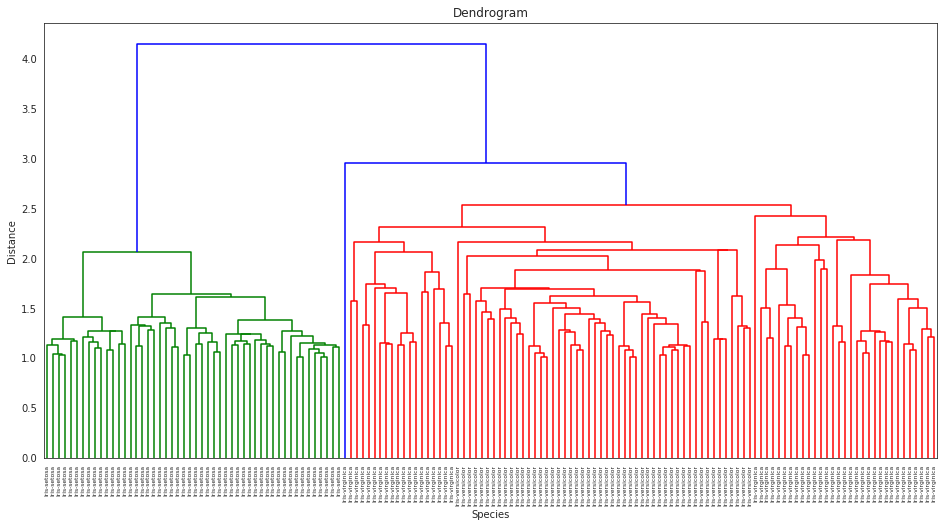

In [47]:
plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(mergings,
           labels=species,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()


## Complete Linkage

Complete Linkage:

- cluster distance is the largest distance between any point in cluster 1 and any point in cluster 2
- less sensitive to outliers than single linkage

In [48]:
mergings = sch.linkage(df_iris.values, metric='euclidean', method='complete')

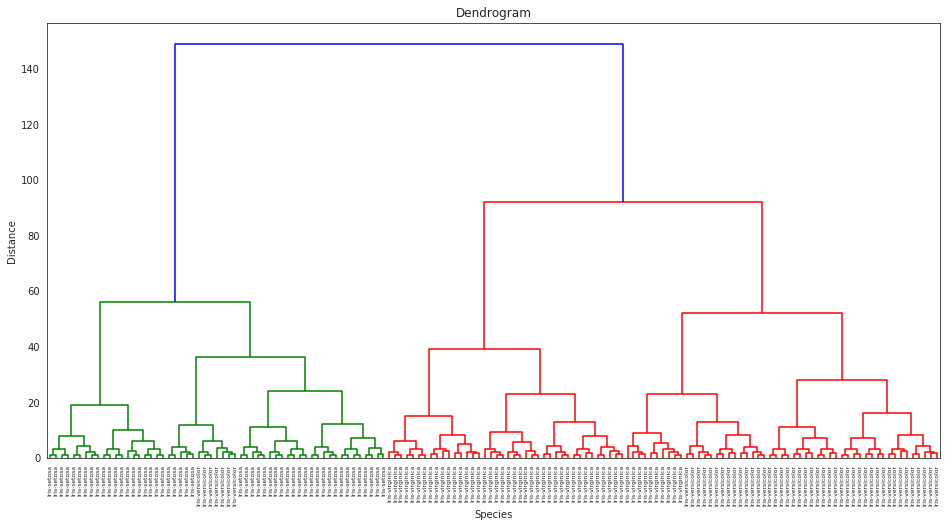

In [49]:
plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(mergings,
           labels=species,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()

## Average Linkage

Average Linkage:

- cluster distance is the average distance of all pairs of points in clusters 1 and 2

In [52]:
mergings = sch.linkage(df_iris.values, metric='euclidean', method='average')

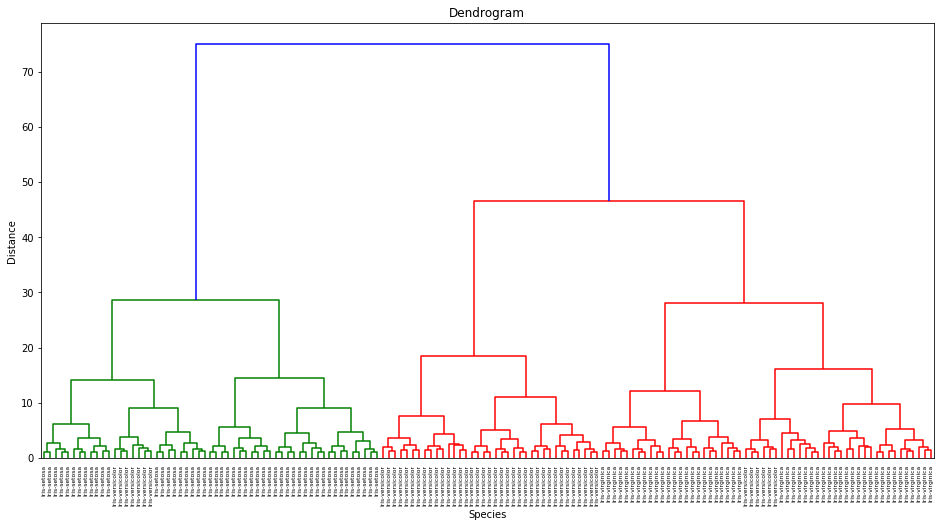

In [53]:
plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(mergings,
           labels=species,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()

## Centroid Linkage

Average Linkage:

- cluster distance is the distance of the centroids of both clusters

In [56]:
mergings = sch.linkage(df_iris.values, metric='euclidean', method='centroid')

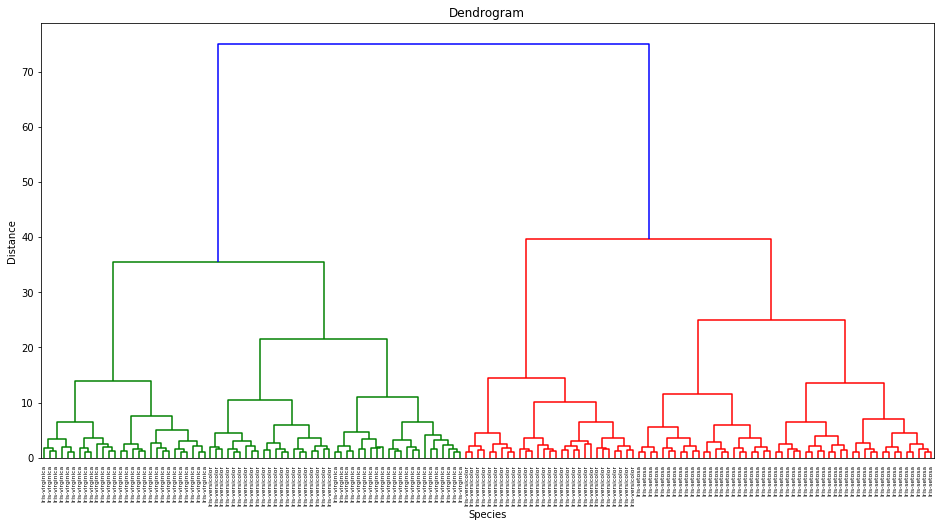

In [57]:
plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(mergings,
           labels=species,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()

## Ward Linkage

Ward linkage:

- based on minimizing a variance criterion before and after merging

In [58]:
mergings = sch.linkage(df_iris.values, metric='euclidean', method='ward')

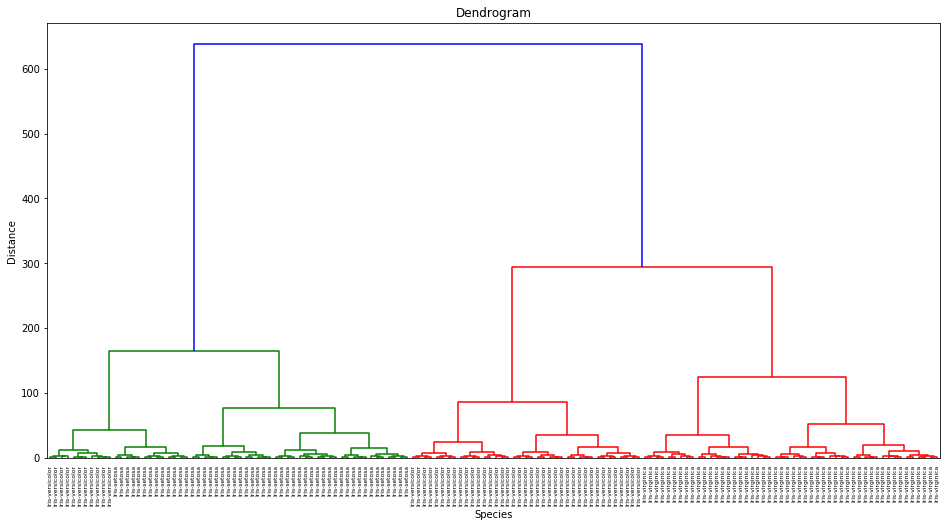

In [59]:
plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(mergings,
           labels=species,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()

## Clusters using agglomerative clustering (bottom-up)

#### Let’s now divide our data into three clusters:

In [50]:

groups = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = groups.fit_predict(df_iris)

In [51]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Comparing with original dataset labels
